# Installing PyCaret

In [1]:
!pip install pycaret

In [10]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode activated.


# Getting the Data

In [11]:
import pandas as pd
dataset = pd.read_csv('train4.csv')
dataset.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,MonthOfYear,DayOfYear,WeekOfYear,TimeOfDay(h),TimeOfDay(m),TimeOfDay(s),DayLength(s)
0,634.99,61,30.46,41,14.96,6.75,9,273,39,8,530,31823,43200
1,1.27,37,30.26,70,207.43,5.62,12,350,50,1,65,3902,39360
2,1.21,47,30.49,33,168.20,5.62,11,309,44,23,1430,85817,40920
3,1.67,54,30.46,101,152.60,3.37,9,246,35,21,1280,76808,45000
4,839.78,62,30.47,36,291.95,7.87,11,314,45,10,655,39301,40620


In [12]:
data = dataset.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (22054, 13)
Unseen Data For Predictions: (2451, 13)


# Setting up Environment in PyCaret

In [13]:
from pycaret.regression import *


In [14]:
exp_reg101 = setup(data = data, target = 'Radiation', session_id=123)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(22054, 13)"
4,Missing Values,False
5,Numeric Features,10
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


# Comparing All Models

In [9]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,33.991400,6719.364100,81.863400,0.932300,0.409400,0.422600
1,Random Forest,35.717700,6959.835900,83.345000,0.930000,0.392400,0.345800
2,Light Gradient Boosting Machine,39.999600,7107.286900,84.258600,0.928500,0.670200,1.375800
3,CatBoost Regressor,42.849700,7396.073900,85.956400,0.925500,0.933600,2.789000
4,Gradient Boosting Regressor,58.811100,11351.208600,106.516800,0.885700,1.381100,6.209600
5,Extreme Gradient Boosting,59.019700,11444.712100,106.959500,0.884800,1.376700,6.162400
6,Decision Tree,45.649000,12961.158800,113.688100,0.869400,0.467600,0.330300
7,AdaBoost Regressor,85.673600,19345.496600,139.055100,0.805400,1.605500,9.817200
8,K Neighbors Regressor,92.366800,28919.858200,169.943600,0.709200,1.499400,12.512900
9,Linear Regression,140.580800,34219.841200,184.949000,0.655700,2.640100,40.446500


# Create a Model

In [17]:
ETR = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,35.6339,6594.8421,81.2086,0.9358,0.4184,0.4185
1,31.7425,6105.5468,78.1380,0.9365,0.4143,0.4616
2,32.6690,6256.4342,79.0976,0.9342,0.4178,0.4599
3,33.1773,5858.3339,76.5398,0.9453,0.3831,0.3630
4,34.6574,6656.5861,81.5879,0.9372,0.3803,0.3671
5,34.2573,6762.2159,82.2327,0.9337,0.4029,0.4035
6,31.3689,6037.0878,77.6987,0.9350,0.4118,0.4112
7,36.0618,8212.9080,90.6251,0.9185,0.4112,0.4289
8,36.4390,7547.7890,86.8780,0.9249,0.4246,0.4453
9,33.9068,7161.8972,84.6280,0.9225,0.4300,0.4670


In [18]:
print(ETR)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)


In [19]:
RF = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,37.0248,7240.9319,85.0937,0.9295,0.3974,0.3377
1,34.1226,6522.2937,80.7607,0.9321,0.3966,0.3554
2,34.5881,6344.4035,79.6518,0.9332,0.4134,0.3975
3,34.8726,6508.1153,80.6729,0.9392,0.3553,0.2821
4,36.1113,6887.2557,82.9895,0.9350,0.3770,0.3112
5,35.3581,6490.0367,80.5608,0.9364,0.3678,0.3005
6,33.9504,6674.2544,81.6961,0.9281,0.3892,0.3253
7,37.4253,8325.4097,91.2437,0.9174,0.4021,0.3576
8,39.3758,7876.6287,88.7504,0.9216,0.4196,0.4045
9,34.3481,6729.0289,82.0307,0.9272,0.4053,0.3865


In [20]:
print(RF)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)


In [21]:
LGBM = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,40.2470,6758.6677,82.2111,0.9342,0.6750,1.3620
1,39.5546,6772.1895,82.2933,0.9295,0.6752,1.4154
2,39.9333,6934.1391,83.2715,0.9270,0.6955,1.4644
3,38.5572,6472.9863,80.4549,0.9395,0.6358,1.2940
4,41.3230,7564.1373,86.9720,0.9286,0.6516,1.3280
5,40.6465,6925.9582,83.2223,0.9321,0.6637,1.3580
6,38.5606,7145.3168,84.5300,0.9231,0.6769,1.3518
7,40.7755,8021.3637,89.5621,0.9204,0.6498,1.2736
8,42.1008,7727.2798,87.9049,0.9231,0.6787,1.3769
9,38.2975,6750.8302,82.1634,0.9269,0.7001,1.5338


In [22]:
print(LGBM)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


# Tune a Model

ETR model has a R2 score Train = 1 for that reason it couldn't be possible to find better hyperparameters

In [29]:
tuned_ETR = tune_model('et')

IntProgress(value=0, description='Processing: ', max=16)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:43:35
Status,. . . . . . . . . . . . . . . . . .,Tuning Hyperparameters
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


,MAE,MSE,RMSE,R2,RMSLE,MAPE


KeyboardInterrupt: ignored

In [0]:
print(tuned_ETR)

In [25]:
tuned_RF = tune_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,36.9105,7003.1076,83.6846,0.9319,0.4065,0.3561
1,34.8563,6581.2681,81.1250,0.9315,0.4078,0.3749
2,35.1945,6394.0647,79.9629,0.9327,0.4225,0.4145
3,35.2612,6516.6345,80.7257,0.9391,0.3635,0.2969
4,36.0010,6840.0494,82.7046,0.9355,0.3782,0.3122
5,36.1400,6688.6813,81.7844,0.9344,0.3789,0.3098
6,34.3588,6815.4345,82.5556,0.9266,0.3920,0.3265
7,37.6566,8177.0014,90.4268,0.9189,0.4078,0.3682
8,39.8342,7939.1576,89.1020,0.9210,0.4263,0.4104
9,34.6500,6744.1869,82.1230,0.9270,0.4124,0.4006


In [26]:
print(tuned_RF)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=80, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=None, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)


In [27]:
tuned_LGBM = tune_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,40.5533,7066.5059,84.0625,0.9312,0.7905,1.9244
1,39.6536,6707.7501,81.9009,0.9302,0.8017,2.0720
2,39.0587,6787.2137,82.3845,0.9286,0.8074,2.0382
3,39.1991,6831.3647,82.6521,0.9362,0.7719,1.9494
4,40.8815,7247.5306,85.1324,0.9316,0.8046,2.0044
5,39.7978,6934.2383,83.2721,0.9320,0.7889,1.9728
6,38.5873,7363.6920,85.8120,0.9207,0.7961,2.0237
7,40.2922,8239.3034,90.7706,0.9182,0.7414,1.7347
8,41.8941,7791.6454,88.2703,0.9225,0.7853,1.9234
9,38.4157,6582.2230,81.1309,0.9287,0.8280,2.1899


In [28]:
print(tuned_LGBM)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.2, max_depth=30,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0,
              n_estimators=100, n_jobs=-1, num_leaves=70, objective=None,
              random_state=123, reg_alpha=0.1, reg_lambda=0.5, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


At the end ETR regressor is still the best

# Models plots

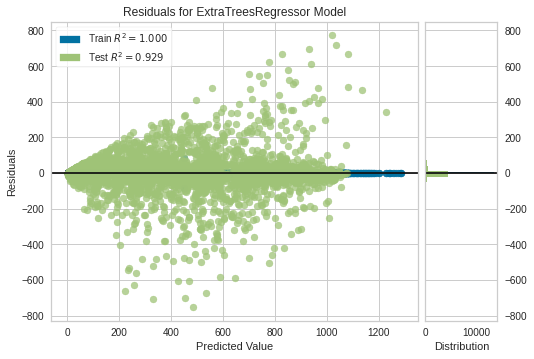

In [42]:
plot_model(ETR)

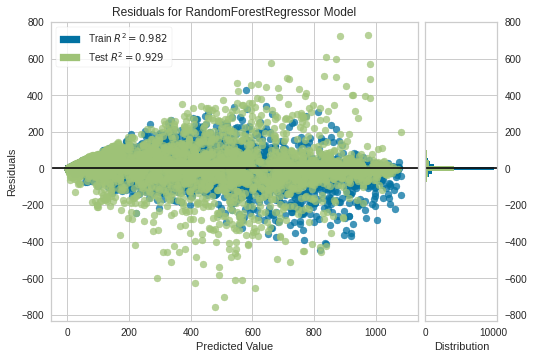

In [30]:
plot_model(tuned_RF)

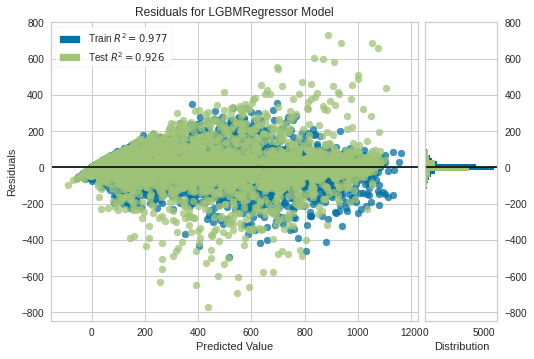

In [31]:
plot_model(tuned_LGBM)

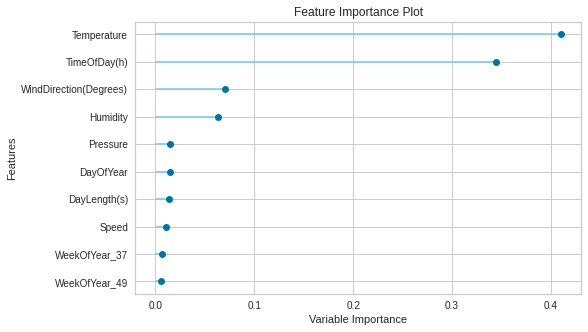

In [41]:
plot_model(ETR, plot='feature')

# Predict on Test / Hold-out Sample

In [34]:
predict_model(ETR);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,33.4429,6987.145,83.5891,0.9292,0.4196,0.4354


# Finalize Model for Deployment

In [36]:
final_ETR = finalize_model(ETR)

In [37]:
print(final_ETR)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)


In [38]:
predict_model(final_ETR);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0088,0.105,0.324,1.0,0.0067,0.0003


# Predict on Unseen Data

In [39]:
unseen = pd.read_csv('test4.csv')

In [40]:
unseen_predictions = predict_model(final_ETR, data=unseen)
unseen_predictions.head()

,id,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,MonthOfYear,DayOfYear,WeekOfYear,TimeOfDay(h),TimeOfDay(m),TimeOfDay(s),DayLength(s),Label
0,0,59,30.47,44,312.67,3.37,11,314,45,9,575,34507,40620,675.6931
1,1,59,30.48,83,38.01,6.75,9,260,37,12,725,43503,44100,825.5258
2,2,47,30.39,78,213.62,5.62,10,284,41,4,260,15621,42420,1.2316
3,3,45,30.40,98,176.63,4.50,12,346,50,6,410,24656,39420,7.1300
4,4,45,30.40,34,175.89,6.75,10,300,43,4,285,17117,41460,1.2160


# Saving the Model and Predictions (Test dataset)

In [45]:
save_model(final_ETR,'Final ETR Model')

Transformation Pipeline and Model Succesfully Saved


In [47]:
unseen_predictions.to_csv(r'predictions_PYCARET.csv',index=False)